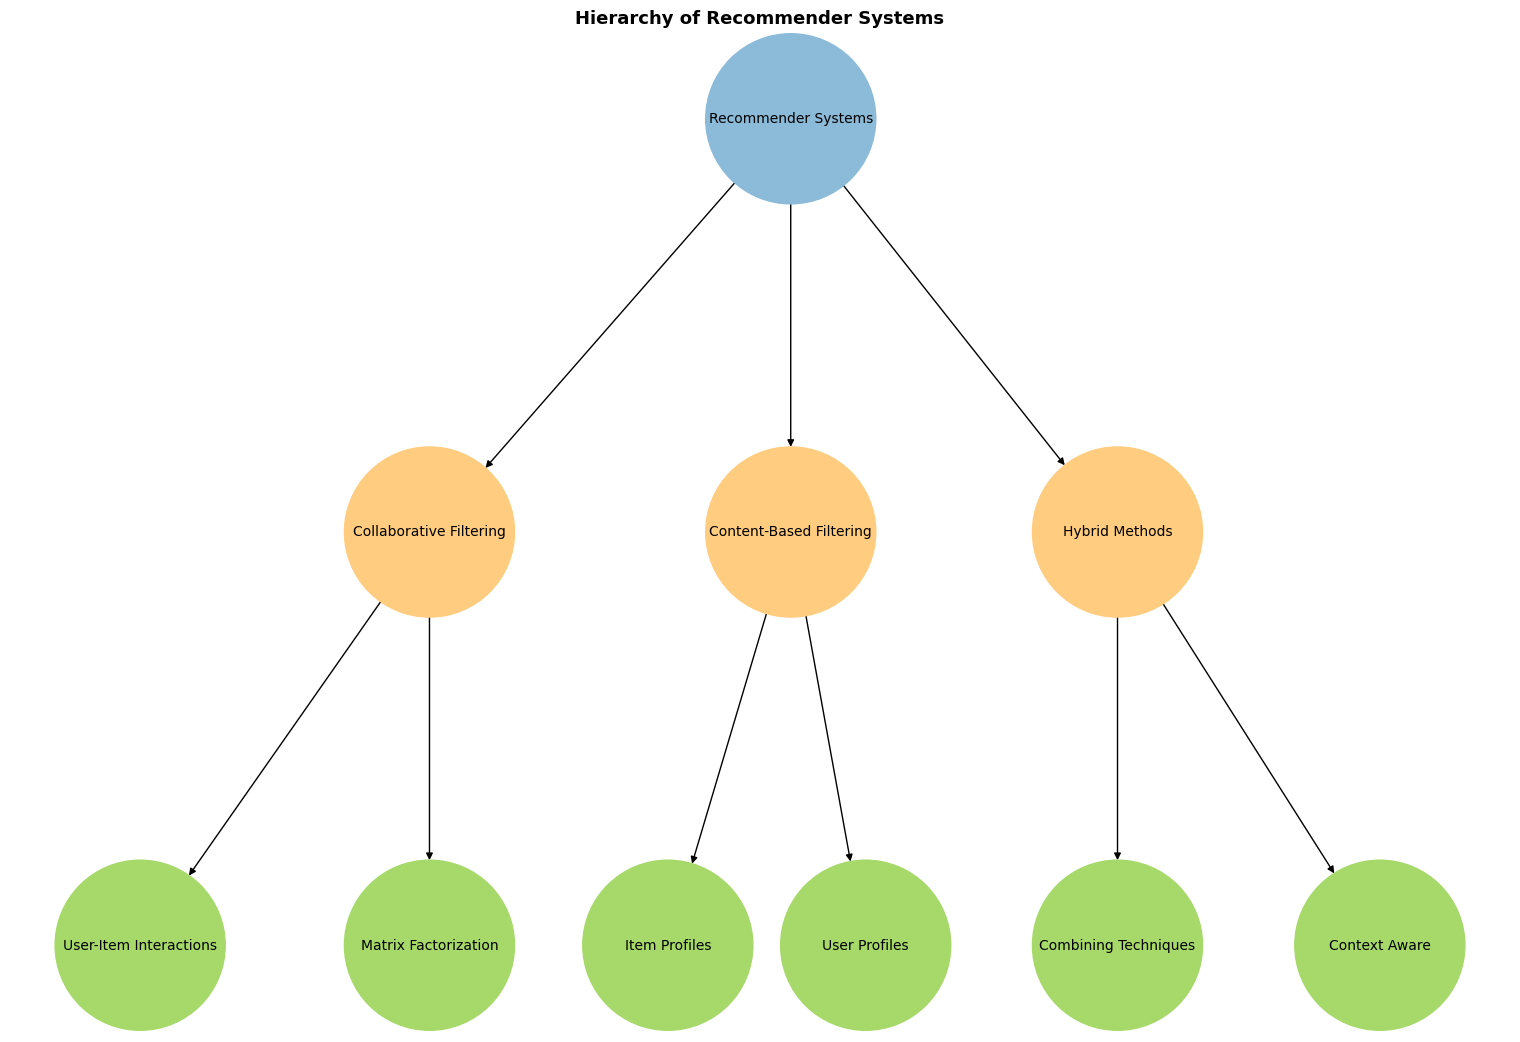

In [25]:
# !pip3 install pygraphviz
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

# Define the structure of the hierarchy
hierarchy = {
    'Recommender Systems': ['Collaborative Filtering', 'Content-Based Filtering', 'Hybrid Methods'],
    'Collaborative Filtering': ['User-Item Interactions', 'Matrix Factorization'],
    'Content-Based Filtering': ['Item Profiles', 'User Profiles'],
    'Hybrid Methods': ['Combining Techniques', 'Context Aware']
}

# Create a directed graph
G = nx.DiGraph()

# Function to add nodes and edges
def add_nodes_and_edges(hierarchy, parent=None):
    if parent is not None and parent not in G:
        G.add_node(parent)
    for node, children in hierarchy.items():
        G.add_node(node)
        if parent is not None:
            G.add_edge(parent, node)
        if isinstance(children, dict):
            add_nodes_and_edges(children, node)
        elif isinstance(children, list):
            for child in children:
                G.add_node(child)
                G.add_edge(node, child)

# Add nodes and edges to the graph
add_nodes_and_edges(hierarchy)

# Define a lighter, colorblind-friendly color palette
colors = ['#8bbbd9', '#ffcc80', '#a6d96a', '#fcb3d8', '#d79b60', '#bca0d3', '#c2c2c2', '#f46d6d', '#ffffb2']

# Apply the color palette
color_map = []
for node in G:
    if node == 'Recommender Systems':
        color_map.append(colors[0])  # Root node
    elif node in hierarchy.keys():
        color_map.append(colors[1])  # Level 2 nodes
    else:
        color_map.append(colors[2])  # Level 3 nodes

# Draw the graph
plt.figure(figsize=(15, 10))
pos = graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True, node_color=color_map, node_size=15000, font_size=10, font_weight='light')
plt.title('Hierarchy of Recommender Systems', size=13, weight='bold')
plt.savefig('../images/hierarchy_recsys.png', bbox_inches='tight')  # Save with tight bounding box
plt.show()


In [31]:
def create_larger_prompt_box_updated(text, filename):
    # Image dimensions and properties
    img_width, img_height = 1000, 300  # Increased dimensions
    background_color = "#8bbbd9"  # Light blue color
    text_color = "black"
    font_size = 20
    padding = 30
    radius = 30

    # Create an image with a white background
    img = Image.new("RGB", (img_width, img_height), background_color)
    draw = ImageDraw.Draw(img)

    # Draw a rounded rectangle
    rectangle_coords = [(padding, padding), (img_width - padding, img_height - padding)]
    draw_rounded_rectangle(draw, rectangle_coords, radius, background_color)

    # Load a TrueType font
    try:
        font = ImageFont.truetype("DejaVuSans.ttf", font_size)
    except IOError:
        font = ImageFont.load_default()

    # Add text with proper alignment using textbbox
    text_lines = text.split('\n')
    text_y = padding + 10
    for line in text_lines:
        text_bbox = draw.textbbox((0, 0), line, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]
        text_x = (img_width - text_width) / 2
        draw.text((text_x, text_y), line, fill=text_color, font=font)
        text_y += text_height + 5

    # Save the image
    img.save(filename)


# Create the image with larger dimensions and better text alignment
text = "How will user rate this product\nTitle: GoodFellas (1990)?\n(1 being lowest and 5 being highest)\nAttention! Just give me back the exact number as a result,\nand you don't need a lot of text."


# Create the image with a TrueType font
create_larger_prompt_box_updated(text, "../images/prompt_box_image.png")
# show the image
img = Image.open("../images/prompt_box_image.png")
img.show()

